# Import Libraries

In [1]:
# to read and wrangle data
import pandas as pd

# to create spatial data
import geopandas as gpd

# for charts
import plotly.express as px

# for basemaps
import contextily as ctx

# for interactive leaflet mapping
import folium

## Set up the dataframes close to the same way they were previously

In [2]:
# Import Califrnia Conservation Easement Database shapefile

CCED = gpd.read_file('../data/CCED_simple/CCED_California_Conservation_Easement_Database.shp')

In [3]:
cbounds = gpd.read_file('../data/counties-2012simple.json')

In [4]:
cbounds=cbounds[['name','geometry']].copy()

In [5]:
type(cbounds)

geopandas.geodataframe.GeoDataFrame

In [6]:
cbounds = cbounds.to_crs(epsg=3857)

In [7]:
cbounds.head()

,name,geometry
0,Alameda,"MULTIPOLYGON (((-13615813.516 4564932.526, -13..."
1,Alpine,"POLYGON ((-13366397.536 4679184.485, -13366396..."
2,Amador,"POLYGON ((-13472693.178 4648773.137, -13472696..."
3,Butte,"POLYGON ((-13567535.937 4765254.592, -13562672..."
4,Calaveras,"POLYGON ((-13455860.001 4583508.370, -13453239..."


In [8]:
CCED_trimmed = CCED[['sitename','esmthldr','eholdtyp','county','gis_acres','year_est','geometry']]

In [9]:
CCED_trimmed.shape

(12297, 7)

In [10]:
CCED_trimmed.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
CCED_trimmed.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12297 entries, 0 to 12296
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sitename   12297 non-null  object  
 1   esmthldr   12297 non-null  object  
 2   eholdtyp   12297 non-null  object  
 3   county     12297 non-null  object  
 4   gis_acres  12297 non-null  float64 
 5   year_est   12297 non-null  int64   
 6   geometry   12297 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(4)
memory usage: 672.6+ KB


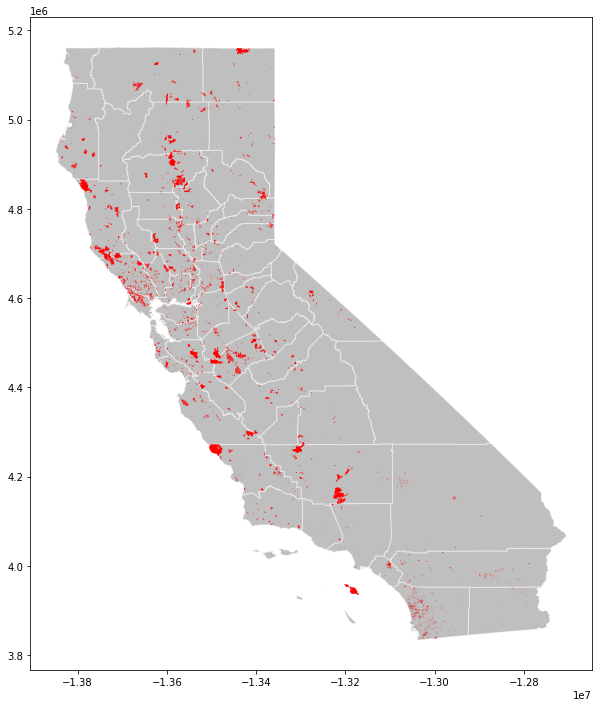

In [14]:
base=cbounds.plot(figsize=(12,12),
                 color='gray',
                 edgecolor='white',
                 alpha=0.5)
ax=CCED_trimmed.plot(ax=base, color='red')

ax.axis=('off')


Text(0.5, 1.0, 'Easements on Private Land inSan DiegoCalifornia')

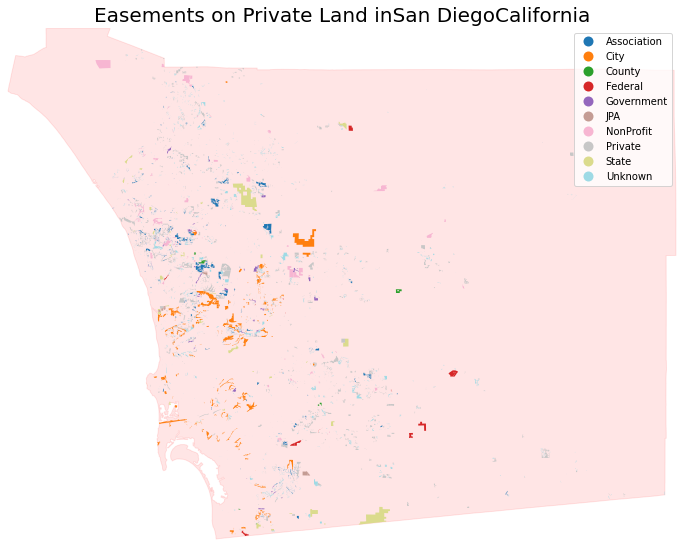

In [18]:
county = cbounds[cbounds.name=='San Diego']

minx, miny, maxx, maxy = county.geometry.total_bounds

eas_in_cbounds = gpd.sjoin(CCED_trimmed,county,how='inner')

base = county.plot(figsize=(12,12),
                        color='red',
                        edgecolor='red',
                        alpha=0.1)

ax = eas_in_cbounds.plot(ax=base,
                        column='eholdtyp',
                        markersize=40,
                        legend=True,
                        cmap='tab20'
                    )

ax.set_xlim(minx - 200, maxx + 200)
ax.set_ylim(miny - 200, maxy + 200)

ax.axis('off')

ax.set_title('Easements on Private Land in '+county.name.values[0]+' California',fontsize=20)

In [19]:
def map_eas_by_county(place='San Diego'):
    
    county = cbounds[cbounds.name==place]

    minx, miny, maxx, maxy = county.geometry.total_bounds

    eas_in_cbounds = gpd.sjoin(CCED_trimmed,county,how='inner')

    base = county.plot(figsize=(12,12),
                            color='red',
                            edgecolor='red',
                            alpha=0.1)

    ax = eas_in_cbounds.plot(ax=base,
                            column='eholdtyp',
                            markersize=40,
                            legend=True,
                            cmap='tab20'
                        )

    ax.set_xlim(minx - 200, maxx + 200)
    ax.set_ylim(miny - 200, maxy + 200)

    ax.axis('off')

    ax.set_title('Easements on Private Land in '+county.name.values[0]+' California',fontsize=20)

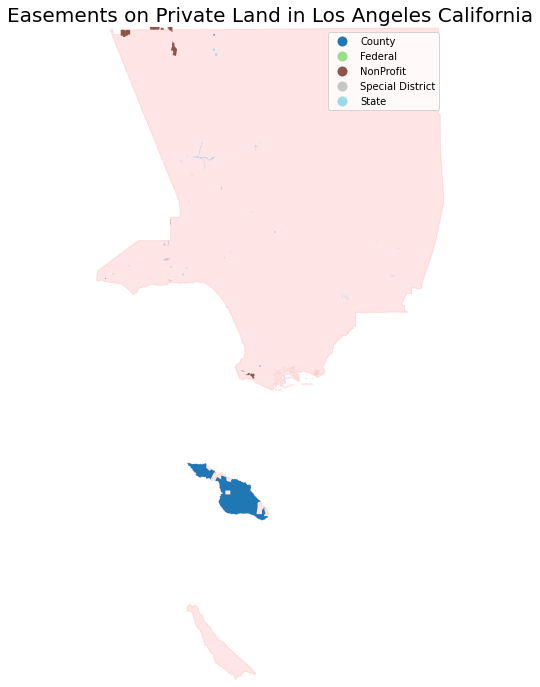

In [20]:
map_eas_by_county(place='Los Angeles')

I think I will need to experiment with using the centroids still because the easements as the geometry are too small to be seen clearly in some instances.